# Single Particle Model (Half-Cell Model with Cathode)
-----------------------------------------------------
This code implements the Single Particle Model (SPM) for a Li-ion battery
using the Finite Volume Method (FVM) to discretize the solid-phase diffusion
equation inside the electrode particles.

This is a half-cell model that focuses on the cathode side, capturing the
lithium concentration dynamics within spherical particles and estimating
the terminal voltage over time.

The use of FVM ensures mass conservation and improves the accuracy of
solving the diffusion partial differential equation.

Key components:
- Solid-phase diffusion in spherical cathode particles
- Butler–Volmer kinetics for reaction rate estimation
- Voltage prediction using electrode overpotentials and open-circuit potential


## Libraries

In [1]:
import numpy as np
import importlib
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from scipy.interpolate import interp1d

## SPM Packages
The cathode material is $ \text{Li(Ni}_{0.4}\text{Co}_{0.6})\text{O}_2 $ or LNC and the battery properties are from the research by Richardson et al. available at: https://doi.org/10.1016/j.electacta.2020.135862

In [2]:
# Import the dimensional and non-dimensional Parameter Values
import Param, NDParam
# Import the Parameter Functions
import Functions
# Import the Finite Volume Method
import FVM
# Import the SPM Solver Functions
import Solver
# Import the Plot Functions
import Plot

In [3]:
# Change the battery properties and conditions
# NDParam.params["dt"] = NDParam.params["dt"]/10   # Change C-rate
# Param.params["I0"] = Param.params["I0"]*4   # Change Current
# Param.params["crate"] = Param.params["crate"]*4   # Change Current
importlib.reload(NDParam)
importlib.reload(Functions)
importlib.reload(FVM)
importlib.reload(Solver)
importlib.reload(Plot)

<module 'Plot' from 'c:\\Users\\Benyamin\\OneDrive - University of Portsmouth\\Documents\\Python Scripts\\DAE Solver\\Github\\Single-Particle-Model\\Plot.py'>

In [4]:
print(f'Dimensional parameters = {Param.params}')
print(f'Non-dimensional parameters = {NDParam.params}')

Dimensional parameters = {'crate': 1, 'I0': -0.15625, 'M': 10, 'F': 96485.3329, 'L': 5.4e-05, 'A': 0.008585, 'epsilonL': 0.296, 'T': 298.15, 'R': 8.3144, 'csinit': 0.25, 'epsilonS': 0.704, 'R0': 6.5e-06, 'csmax': 28176.4, 'Ds': 1e-13, 'k': 5.904e-11, 'U_hat': 1}
Non-dimensional parameters = {'dt': 0.001, 'B': 0.16104141082342763, 'tau': 17035.494742732622, 'Q': 0.024801158192381777, 'I0': -1.0, 'R0': 1, 'b0': 1, 'L': 1, 'csmax': 1, 'G': -1.0}


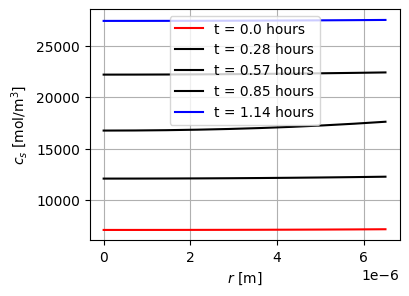

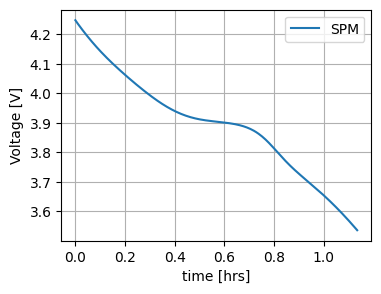

SPM Execution time: 0.331 seconds


In [5]:
solution = Solver.SPM()  # Solve and store results
Plot.results(solution) # Plot and visualise results

### Model Validation Against Literature (SPM by Richardson et al.)
This model is validated by comparing its results with those from the
SPM presented in the paper by Richardson et al. and I extract the SPM data points from the paper.

This benchmarking helps ensure the developed model is robust and credible for 
further applications in battery diagnostics and control. 

In [6]:
# Import the SPM Data
import Data

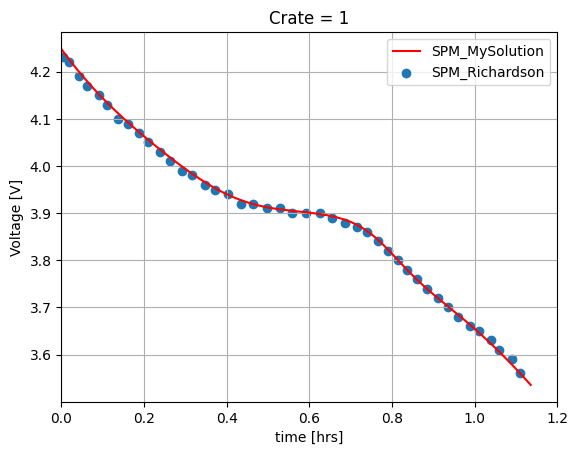

In [7]:
# Plotting
plt.figure()
plt.plot(solution["tnew"][:],solution["V_spm"][:],label='SPM_MySolution',color = 'r' )
plt.scatter(Data.SPM_data["1C"]["t"],Data.SPM_data["1C"]["V"],label='SPM_Richardson')
plt.grid()
plt.legend()
plt.title('Crate = 1')
plt.ylabel("Voltage [V]")
plt.xlabel("time [hrs]")
plt.xlim(0,1.2)
plt.show()

# # Calculate RMSE
# # Interpolate Richardson data to match the time points of your SPM solution
# interp_V = interp1d(Data.SPM_data["1C"]["t"], Data.SPM_data["1C"]["V"], kind='linear', bounds_error=False, fill_value="extrapolate")
# # Interpolate reference voltage at model time points
# V_data = interp_V(solution["tnew"])
# rmse = np.sqrt(mean_squared_error(solution["V_spm"], V_data))
# print(f"RMSE between SPM and cSPM voltage: {rmse * 1000:.2f} mV")

## Diffusion and Equilibrium potential Functions

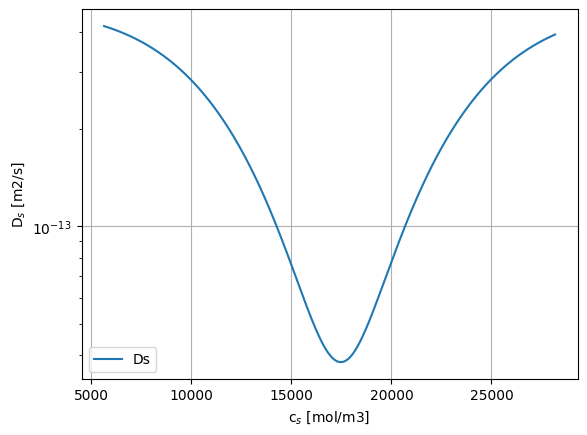

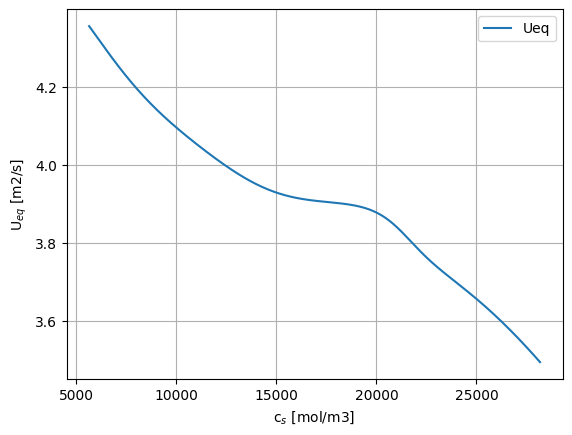

In [8]:
cs = np.linspace(2e-1,1,1000)
Ds = Functions.Ds_cs(cs)*Param.params["Ds"]
# Ds Function
plt.figure()
plt.semilogy(cs*Param.params["csmax"],Ds, label = "Ds")
plt.xlabel("c$_s$ [mol/m3]")
plt.ylabel("D$_s$ [m2/s]")
plt.legend()
plt.grid()
plt.show()

# Ueq Function
Ueq = Functions.Ueq_cathode(cs)*Param.params["U_hat"]
plt.figure()
plt.plot(cs*Param.params["csmax"],Ueq, label = "Ueq")
plt.xlabel("c$_s$ [mol/m3]")
plt.ylabel("U$_{eq}$ [m2/s]")
plt.legend()
plt.grid()
plt.show()

## Grid search

In [9]:
# # Import the Grid search
# import GridSearch
# GridSearch.dr_Search([50,30,5])